# PD模型训练

## 1. 加载训练集与测试集

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set()

In [7]:
inputs_train_bk = pd.read_csv('inputs_train.csv', index_col=0)
targets_train_bk = pd.read_csv('targets_train.csv', index_col=0)
inputs_test_bk = pd.read_csv('inputs_test.csv', index_col=0)
targets_test_bk = pd.read_csv('targets_test.csv', index_col=0)

In [8]:
inputs_train = inputs_train_bk.copy()
targets_train = targets_train_bk.copy()
inputs_test = inputs_test_bk.copy()
targets_test = targets_test_bk.copy()

In [9]:
inputs_train.head()

,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,home_ownership:MORTGAGE,home_ownership:OWN,home_ownership:RENT,verification_status:Not Verified,...,mths_since_last_record:Missing,mths_since_last_record:3-20,mths_since_last_record:21-31,mths_since_last_record:32-80,mths_since_last_record:81-86,mths_since_last_record:>86,tot_coll_amt:Missing,tot_coll_amt:>0,tot_cur_bal:Missing,tot_cur_bal:>0
163968,1,0,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,1
190522,0,0,0,1,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,1
457953,0,1,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,1
439306,0,1,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,1
358628,0,0,0,1,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,1


In [10]:
targets_train.head()

,good_bad
163968,1
190522,1
457953,1
439306,1
358628,1


In [11]:
# 将标签DataFrame转换成Series，不然拟合会有warning，一些方法不能用。
targets_train = targets_train_bk.good_bad

In [12]:
# 标签有偏斜，8/9的数据为标签为1, 1/9的数据标签为0
targets_train.value_counts()

1    331992
0     40329
Name: good_bad, dtype: int64

assert False, "breakpoint"

## 2. PD model求解

In [13]:
from sklearn.linear_model import LogisticRegression # 逻辑回归
from sklearn.metrics import classification_report # 分类模型度量
from sklearn.metrics import plot_roc_curve # ROC绘制函数
from sklearn.metrics import roc_auc_score # ROC曲线下面积

In [14]:
#log_reg = LogisticRegression(solver='saga', max_iter=500, n_jobs=-1)
log_reg = LogisticRegression()
log_reg.fit(inputs_train, targets_train)

/home/ligy/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [15]:
log_reg.intercept_

array([-0.89548027])

In [16]:
log_reg.coef_

array([[ 1.10182366,  0.90415097,  0.71277113,  0.53557247,  0.38681833,
         0.25162936,  0.04769548,  0.02725123, -0.06819274,  0.09658835,
        -0.00847147,  0.56254511,  0.53819324,  0.45743938,  0.71110843,
         0.47773069,  0.37012278,  0.06026192,  0.04593323,  0.0637862 ,
         0.07779513,  0.08124475,  0.0851219 ,  0.14776373,  0.09070716,
         0.20054169,  0.24556601,  0.2416188 ,  0.28509554,  0.32974593,
         0.53322897,  0.06632827,  0.12848843,  0.11984929,  0.09466628,
         0.058822  ,  0.13075804,  0.90116271,  0.71278771,  0.61631341,
         0.41218011,  0.24641174,  0.02158532, -0.07034756,  0.99901364,
         0.60856948,  0.34979335,  0.13852684,  0.0513913 ,  0.01896079,
         0.05612991,  0.08194905,  0.10163794,  0.05788586,  0.01527038,
         0.67503553,  0.53406815,  0.33779573, -0.05980648, -0.11157887,
        -0.12346478, -0.14567038, -0.13568228, -0.10926121, -0.1709709 ,
         0.00516178,  0.05466881, -0.04247668, -0.0

In [17]:
data = log_reg.coef_
data.shape

(1, 111)

In [18]:
coefficients = inputs_train.columns
coefficients = np.array(coefficients).reshape(1, -1)
coefficients.shape

(1, 111)

In [19]:
# 构造DataFrame
data = log_reg.coef_.T
features = list(inputs_train.columns)
summary_table = pd.DataFrame(features, columns=['Feature_name'])
summary_table['coefficients'] = data
summary_table.index = summary_table.index + 1 # index向下移动一位

In [20]:
pd.options.display.max_rows = 100
summary_table.loc[0, 'Feature_name'] = 'intercept'
summary_table.loc[0, 'coefficients'] = log_reg.intercept_
summary_table = summary_table.sort_index() # 按index排序
summary_table

,Feature_name,coefficients
0,intercept,-0.895480
1,grade:A,1.101824
2,grade:B,0.904151
3,grade:C,0.712771
4,grade:D,0.535572
...,...,...
107,mths_since_last_record:>86,0.249942
108,tot_coll_amt:Missing,-0.348013
109,tot_coll_amt:>0,-0.028200
110,tot_cur_bal:Missing,-0.348013


In [21]:
# 用在训练集上训练的模型预测训练集
pred_train = log_reg.predict(inputs_train)

In [22]:
# 训练集上的分类指标报告
print(classification_report(pred_train, targets_train))

              precision    recall  f1-score   support

           0       0.00      0.50      0.00        90
           1       1.00      0.89      0.94    372231

    accuracy                           0.89    372321
   macro avg       0.50      0.70      0.47    372321
weighted avg       1.00      0.89      0.94    372321



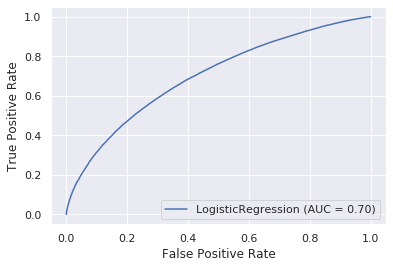

In [23]:
# 训练集上的ROC曲线
plot_roc_curve(log_reg, inputs_train, targets_train);

In [24]:
# 训练集上的ROC曲线下面积
roc_auc_score(pred_train, targets_train)

0.6958884402427525

## 3. 测试集上的性能（范化能力）

In [25]:
# 用在训练集上训练的模型预测测试集
pred_test = log_reg.predict(inputs_test)

In [26]:
# 测试集上的分类指标报告
print(classification_report(pred_test, targets_test))

              precision    recall  f1-score   support

           0       0.00      0.40      0.00        20
           1       1.00      0.89      0.94     93061

    accuracy                           0.89     93081
   macro avg       0.50      0.65      0.47     93081
weighted avg       1.00      0.89      0.94     93081



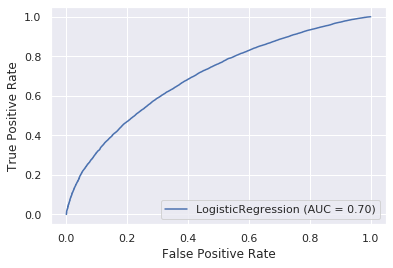

In [27]:
# 测试集上的ROC曲线
plot_roc_curve(log_reg, inputs_test, targets_test);

In [28]:
# 测试集上的ROC曲线下面积
roc_auc_score(pred_test, targets_test)

0.6453530480007736

为什么函数求的和图上的不一致？

## 4. 用统计显著性检验筛选变量，来提升模型性能

In [29]:
# P values for sklearn logistic regression.

# Class to display p-values for logistic regression in sklearn.

from sklearn import linear_model
import scipy.stats as stat

class LogisticRegression_with_p_values:
    
    def __init__(self,*args,**kwargs):#,**kwargs):
        self.model = linear_model.LogisticRegression(*args,**kwargs)#,**args)

    def fit(self,X,y):
        self.model.fit(X,y)
        
        #### Get p-values for the fitted model ####
        denom = (2.0 * (1.0 + np.cosh(self.model.decision_function(X))))
        denom = np.tile(denom,(X.shape[1],1)).T
        F_ij = np.dot((X / denom).T,X) ## Fisher Information Matrix
        Cramer_Rao = np.linalg.inv(F_ij) ## Inverse Information Matrix
        sigma_estimates = np.sqrt(np.diagonal(Cramer_Rao))
        z_scores = self.model.coef_[0] / sigma_estimates # z-score for eaach model coefficient
        p_values = [stat.norm.sf(abs(x)) * 2 for x in z_scores] ### two tailed test for p-values
        
        self.coef_ = self.model.coef_
        self.intercept_ = self.model.intercept_
        #self.z_scores = z_scores
        self.p_values = p_values
        #self.sigma_estimates = sigma_estimates
        #self.F_ij = F_ij

In [30]:
log_reg2 = LogisticRegression_with_p_values()

In [31]:
log_reg2.fit(inputs_train, targets_train)

/home/ligy/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/ligy/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:21: RuntimeWarning: invalid value encountered in sqrt


In [32]:
# 构造DataFrame
data = log_reg2.coef_.T
features = list(inputs_train.columns)
summary_table = pd.DataFrame(features, columns=['Feature_name'])
summary_table['coefficients'] = data
summary_table.index = summary_table.index + 1 # index向下移动一位

pd.options.display.max_rows = 100
summary_table.loc[0, 'Feature_name'] = 'intercept'
summary_table.loc[0, 'coefficients'] = log_reg2.intercept_
summary_table = summary_table.sort_index() # 按index排序
# summary_table

In [34]:
p_values = [np.nan]
p_values += log_reg2.p_values
len(p_values)

112

In [35]:
pd.options.display.max_rows = None
summary_table['p_values'] = p_values
summary_table

,Feature_name,coefficients,p_values
0,intercept,-0.895480,NaN
1,grade:A,1.101824,1.236837e-32
2,grade:B,0.904151,2.702702e-49
3,grade:C,0.712771,3.874422e-36
4,grade:D,0.535572,3.095264e-23
5,grade:E,0.386818,8.834271e-16
6,grade:F,0.251629,5.584607e-07
7,home_ownership:MORTGAGE,0.047695,8.248748e-01
8,home_ownership:OWN,0.027251,8.996676e-01
9,home_ownership:RENT,-0.068193,7.516523e-01


p值小于0.05代表显著。如果某个变量的dummy分组显著，则保留这个变量的整个dummy变量；否则，丢弃这个变量。

In [36]:
# 以p值选择的变量
keep_list = ['grade', 'verification_status', 'purpose', 'initial_list_status', 
             'addr_state', 'term', 'emp_length', 'issue_d', 'int_rate', 'earliest_cr_line',
             'inq_last_6mths', 'total_acc', 'total_rev_hi_lim', 'annual_inc', 
             'mths_since_last_delinq', 'dti', 'mths_since_last_record']

In [37]:
# 获得保留变量对应的dummy变量
kept_dummies = [x for x in inputs_train.columns if x.split(':')[0] in keep_list]

In [38]:
kept_dummies

['grade:A',
 'grade:B',
 'grade:C',
 'grade:D',
 'grade:E',
 'grade:F',
 'verification_status:Not Verified',
 'verification_status:Source Verified',
 'purpose:credit_card',
 'purpose:car_major_purchase_home_improvement',
 'purpose:debt_consolidation',
 'purpose:wedding_vacation',
 'purpose:medical_other_house',
 'purpose:renewable_energy_moving',
 'initial_list_status:w',
 'addr_state:NM_VA',
 'addr_state:NY',
 'addr_state:OK_TN_MO_LA_MD_NC',
 'addr_state:CA',
 'addr_state:UT_KY_AZ_NJ',
 'addr_state:AR_MI_PA_OH_MN',
 'addr_state:RI_MA_DE_SD_IN',
 'addr_state:GA_WA_OR',
 'addr_state:WI_MT',
 'addr_state:TX',
 'addr_state:IL_CT',
 'addr_state:KS_SC_CO_VT_AK_MS',
 'addr_state:WV_NH_WY_DC_ME_ID',
 'term:36',
 'emp_length:1',
 'emp_length:2_3_4',
 'emp_length:5_6',
 'emp_length:7_8_9',
 'emp_length:10',
 'issue_d:<38',
 'issue_d:38-39',
 'issue_d:40-41',
 'issue_d:42-48',
 'issue_d:49-52',
 'issue_d:53-64',
 'issue_d:65-84',
 'int_rate:<9.548',
 'int_rate:9.548-12.025',
 'int_rate:12.025-15

In [39]:
# 提取保留的DataFrame
inputs_train_p = inputs_train[kept_dummies]

In [40]:
inputs_train_p.shape

(372321, 92)

重新训练模型

In [41]:
log_reg3 = LogisticRegression_with_p_values(solver='saga')

In [42]:
log_reg3.fit(inputs_train_p, targets_train)

In [68]:
# 构造DataFrame
data = log_reg3.coef_.T
features = list(inputs_train_p.columns)
summary_table = pd.DataFrame(features, columns=['Feature_name'])
summary_table['coefficients'] = data
summary_table.index = summary_table.index + 1 # index向下移动一位

pd.options.display.max_rows = 100
summary_table.loc[0, 'Feature_name'] = 'intercept'
summary_table.loc[0, 'coefficients'] = log_reg3.intercept_
summary_table = summary_table.sort_index() # 按index排序
# summary_table

In [71]:
p_values = [np.nan]
p_values += log_reg3.p_values
pd.options.display.max_rows = None
summary_table['p_values'] = p_values
summary_table

,Feature_name,coefficients,p_values
0,intercept,-1.718065,NaN
1,grade:A,1.091366,4.036545e-32
2,grade:B,0.892271,2.293437e-48
3,grade:C,0.700715,2.326512e-35
4,grade:D,0.522524,1.458930e-22
5,grade:E,0.377909,1.070329e-15
6,grade:F,0.244267,6.479200e-07
7,verification_status:Not Verified,0.091424,6.049602e-10
8,verification_status:Source Verified,-0.013726,3.094743e-01
9,purpose:credit_card,0.562635,1.004127e-55


In [47]:
# 以p值选择测试集中的变量
inputs_test_p = inputs_test[kept_dummies]

In [50]:
# 用在训练集上训练的模型预测测试集
pred_test = log_reg3.model.predict(inputs_test_p)

In [44]:
# 测试集上的分类指标报告
print(classification_report(pred_test, targets_test))

              precision    recall  f1-score   support

           0       0.00      0.40      0.00        20
           1       1.00      0.89      0.94     93061

    accuracy                           0.89     93081
   macro avg       0.50      0.65      0.47     93081
weighted avg       1.00      0.89      0.94     93081



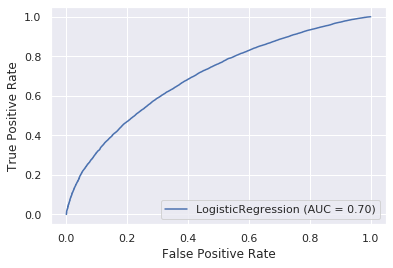

In [45]:
# 测试集上的ROC曲线
plot_roc_curve(log_reg, inputs_test, targets_test);

In [46]:
# 测试集上的ROC曲线下面积
roc_auc_score(pred_test, targets_test)

0.6453530480007736

*保存模型*

In [150]:
import pickle
pickle.dump(log_reg3, open('pd_model.sav', 'wb'))

## 5. 应用PD模型

计算特定用户的违约概率PD

In [51]:
# 计算每个类对应的概率
pred_proba = log_reg3.model.predict_proba(inputs_test_p)

In [52]:
# 第一个数是实例被分为第一个类的概率，即为 1-PD
# 第二个数是实例被分为第二个类的概率，即为 PD
pred_proba

array([[0.06601381, 0.93398619],
       [0.08817979, 0.91182021],
       [0.03173901, 0.96826099],
       ...,
       [0.0856807 , 0.9143193 ],
       [0.19603688, 0.80396312],
       [0.04218682, 0.95781318]])

In [53]:
# 取出违约概率
pred_default_proba = pred_proba[:, 1]

In [54]:
pred_default_proba

array([0.93398619, 0.91182021, 0.96826099, ..., 0.9143193 , 0.80396312,
       0.95781318])

## 6. 创建评分卡

In [55]:
# 数据准备阶段保留变量的各个参考dummy
ref_dummy = ['grade:G',
 'home_ownership:NONE_OTHER_ANY',
 'verification_status:Verified',
 'purpose:educational_small_business',
 'initial_list_status:f',
 'addr_state:ND_NE_IA_NV_FL_HI_AL',
 'term:60',
 'emp_length:0',
 'issue_d:>84',
 'int_rate:>20.281',
 'earliest_cr_line:<140',
 'delinq_2yrs:>=4',
 'inq_last_6mths:>6',
 'open_acc:0',
 'pub_rec:0-2',
 'total_acc:<=27',
 'acc_now_delinq:0',
 'total_rev_hi_lim:<=5K',
 'annual_inc:<20K',
 'mths_since_last_delinq:0-3',
 'dti:>34',
 'mths_since_last_record:0-2',
 'tot_coll_amt:0',
 'tot_cur_bal:0']

In [58]:
# 在这些参考dummy中留下p值检验显著的变量
ref_list = [x for x in ref_dummy if x.split(':')[0] in keep_list]

In [59]:
ref_list

['grade:G',
 'verification_status:Verified',
 'purpose:educational_small_business',
 'initial_list_status:f',
 'addr_state:ND_NE_IA_NV_FL_HI_AL',
 'term:60',
 'emp_length:0',
 'issue_d:>84',
 'int_rate:>20.281',
 'earliest_cr_line:<140',
 'inq_last_6mths:>6',
 'total_acc:<=27',
 'total_rev_hi_lim:<=5K',
 'annual_inc:<20K',
 'mths_since_last_delinq:0-3',
 'dti:>34',
 'mths_since_last_record:0-2']

In [64]:
summary_table

,Feature_name,coefficients,p_values
0,intercept,-0.895480,NaN
1,grade:A,1.101824,1.236837e-32
2,grade:B,0.904151,2.702702e-49
3,grade:C,0.712771,3.874422e-36
4,grade:D,0.535572,3.095264e-23
5,grade:E,0.386818,8.834271e-16
6,grade:F,0.251629,5.584607e-07
7,home_ownership:MORTGAGE,0.047695,8.248748e-01
8,home_ownership:OWN,0.027251,8.996676e-01
9,home_ownership:RENT,-0.068193,7.516523e-01


In [73]:
# 将参考dummy组装成一个DataFrame
df_ref = pd.DataFrame(ref_list, columns = ['Feature_name'])
df_ref['coefficients'] = 0
df_ref['p_values'] = np.nan
df_ref

,Feature_name,coefficients,p_values
0,grade:G,0,NaN
1,verification_status:Verified,0,NaN
2,purpose:educational_small_business,0,NaN
3,initial_list_status:f,0,NaN
4,addr_state:ND_NE_IA_NV_FL_HI_AL,0,NaN
5,term:60,0,NaN
6,emp_length:0,0,NaN
7,issue_d:>84,0,NaN
8,int_rate:>20.281,0,NaN
9,earliest_cr_line:<140,0,NaN


In [76]:
# 将系数和参考dummy合并
df_scorecard = pd.concat([summary_table, df_ref])
df_scorecard = df_scorecard.reset_index()
df_scorecard['Original_feature_name'] = df_scorecard['Feature_name'].str.split(':').str[0]
df_scorecard

,index,Feature_name,coefficients,p_values,Original_feature_name
0,0,intercept,-1.718065,NaN,intercept
1,1,grade:A,1.091366,4.036545e-32,grade
2,2,grade:B,0.892271,2.293437e-48,grade
3,3,grade:C,0.700715,2.326512e-35,grade
4,4,grade:D,0.522524,1.458930e-22,grade
5,5,grade:E,0.377909,1.070329e-15,grade
6,6,grade:F,0.244267,6.479200e-07,grade
7,7,verification_status:Not Verified,0.091424,6.049602e-10,verification_status
8,8,verification_status:Source Verified,-0.013726,3.094743e-01,verification_status
9,9,purpose:credit_card,0.562635,1.004127e-55,purpose


In [77]:
# 设置分数范围
min_score = 300
max_score = 850

In [79]:
# 找到每个变量分组中最小的系数分组
df_scorecard.groupby('Original_feature_name')['coefficients'].min()

Original_feature_name
addr_state                0.000000
annual_inc               -0.022844
dti                       0.000000
earliest_cr_line          0.000000
emp_length                0.000000
grade                     0.000000
initial_list_status       0.000000
inq_last_6mths            0.000000
int_rate                  0.000000
intercept                -1.718065
issue_d                  -0.077306
mths_since_last_delinq    0.000000
mths_since_last_record    0.000000
purpose                   0.000000
term                      0.000000
total_acc                -0.044701
total_rev_hi_lim          0.000000
verification_status      -0.013726
Name: coefficients, dtype: float64

In [81]:
# 最小值之和
min_sum_coef = df_scorecard.groupby('Original_feature_name')['coefficients'].min().sum()
min_sum_coef

-1.8766423104671484

In [82]:
# 找到每个变量分组中最大的系数分组
df_scorecard.groupby('Original_feature_name')['coefficients'].max()

Original_feature_name
addr_state                0.524380
annual_inc                0.610280
dti                       0.376809
earliest_cr_line          0.122076
emp_length                0.145245
grade                     1.091366
initial_list_status       0.062461
inq_last_6mths            0.692476
int_rate                  1.013780
intercept                -1.718065
issue_d                   1.053249
mths_since_last_delinq    0.112349
mths_since_last_record    0.599422
purpose                   0.692429
term                      0.057785
total_acc                 0.000000
total_rev_hi_lim          0.274348
verification_status       0.091424
Name: coefficients, dtype: float64

In [84]:
# 最大值之和
max_sum_coef = df_scorecard.groupby('Original_feature_name')['coefficients'].max().sum()
max_sum_coef

5.801811843806191

In [87]:
# 将分数与系数相对应
df_scorecard['score'] = df_scorecard['coefficients'] * (max_score - min_score) / (max_sum_coef - min_sum_coef)
df_scorecard

,index,Feature_name,coefficients,p_values,Original_feature_name,score
0,0,intercept,-1.718065,NaN,intercept,-123.063302
1,1,grade:A,1.091366,4.036545e-32,grade,78.173446
2,2,grade:B,0.892271,2.293437e-48,grade,63.912448
3,3,grade:C,0.700715,2.326512e-35,grade,50.191550
4,4,grade:D,0.522524,1.458930e-22,grade,37.427859
5,5,grade:E,0.377909,1.070329e-15,grade,27.069256
6,6,grade:F,0.244267,6.479200e-07,grade,17.496609
7,7,verification_status:Not Verified,0.091424,6.049602e-10,verification_status,6.548576
8,8,verification_status:Source Verified,-0.013726,3.094743e-01,verification_status,-0.983191
9,9,purpose:credit_card,0.562635,1.004127e-55,purpose,40.300952


In [89]:
df_scorecard['score'][0] = ((df_scorecard['coefficients'][0] - min_sum_coef) / (max_sum_coef - min_sum_coef)) * (max_score - min_score) + min_score
df_scorecard

/home/ligy/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,index,Feature_name,coefficients,p_values,Original_feature_name,score
0,0,intercept,-1.718065,NaN,intercept,311.358712
1,1,grade:A,1.091366,4.036545e-32,grade,78.173446
2,2,grade:B,0.892271,2.293437e-48,grade,63.912448
3,3,grade:C,0.700715,2.326512e-35,grade,50.191550
4,4,grade:D,0.522524,1.458930e-22,grade,37.427859
5,5,grade:E,0.377909,1.070329e-15,grade,27.069256
6,6,grade:F,0.244267,6.479200e-07,grade,17.496609
7,7,verification_status:Not Verified,0.091424,6.049602e-10,verification_status,6.548576
8,8,verification_status:Source Verified,-0.013726,3.094743e-01,verification_status,-0.983191
9,9,purpose:credit_card,0.562635,1.004127e-55,purpose,40.300952


In [90]:
# 将分数取整
df_scorecard['preliminary'] = df_scorecard['score'].round()
df_scorecard

,index,Feature_name,coefficients,p_values,Original_feature_name,score,preliminary
0,0,intercept,-1.718065,NaN,intercept,311.358712,311.0
1,1,grade:A,1.091366,4.036545e-32,grade,78.173446,78.0
2,2,grade:B,0.892271,2.293437e-48,grade,63.912448,64.0
3,3,grade:C,0.700715,2.326512e-35,grade,50.191550,50.0
4,4,grade:D,0.522524,1.458930e-22,grade,37.427859,37.0
5,5,grade:E,0.377909,1.070329e-15,grade,27.069256,27.0
6,6,grade:F,0.244267,6.479200e-07,grade,17.496609,17.0
7,7,verification_status:Not Verified,0.091424,6.049602e-10,verification_status,6.548576,7.0
8,8,verification_status:Source Verified,-0.013726,3.094743e-01,verification_status,-0.983191,-1.0
9,9,purpose:credit_card,0.562635,1.004127e-55,purpose,40.300952,40.0


In [91]:
# 检查最小值 
min_sum_score_prel = df_scorecard.groupby('Original_feature_name')['preliminary'].min().sum()
min_sum_score_prel

299.0

In [93]:
# 检查最大值
max_sum_score_prel = df_scorecard.groupby('Original_feature_name')['preliminary'].max().sum()
max_sum_score_prel

851.0

最大分数超出了范围，所以对取整个变化最大的分组分数进行减一

In [120]:
# 找到每个变量分组中最大的系数分组
df_scorecard.groupby('Original_feature_name')['preliminary'].max().sort_values()

Original_feature_name
total_acc                   0.0
term                        4.0
initial_list_status         4.0
verification_status         7.0
mths_since_last_delinq      8.0
earliest_cr_line            9.0
emp_length                 10.0
total_rev_hi_lim           20.0
dti                        27.0
addr_state                 38.0
mths_since_last_record     43.0
annual_inc                 44.0
inq_last_6mths             50.0
purpose                    50.0
int_rate                   73.0
issue_d                    75.0
grade                      78.0
intercept                 311.0
Name: preliminary, dtype: float64

In [94]:
# 找到取整影响最大的变量分组
df_scorecard['Difference'] = df_scorecard['preliminary'] - df_scorecard['score']
df_scorecard

,index,Feature_name,coefficients,p_values,Original_feature_name,score,preliminary,Difference
0,0,intercept,-1.718065,NaN,intercept,311.358712,311.0,-0.358712
1,1,grade:A,1.091366,4.036545e-32,grade,78.173446,78.0,-0.173446
2,2,grade:B,0.892271,2.293437e-48,grade,63.912448,64.0,0.087552
3,3,grade:C,0.700715,2.326512e-35,grade,50.191550,50.0,-0.191550
4,4,grade:D,0.522524,1.458930e-22,grade,37.427859,37.0,-0.427859
5,5,grade:E,0.377909,1.070329e-15,grade,27.069256,27.0,-0.069256
6,6,grade:F,0.244267,6.479200e-07,grade,17.496609,17.0,-0.496609
7,7,verification_status:Not Verified,0.091424,6.049602e-10,verification_status,6.548576,7.0,0.451424
8,8,verification_status:Source Verified,-0.013726,3.094743e-01,verification_status,-0.983191,-1.0,-0.016809
9,9,purpose:credit_card,0.562635,1.004127e-55,purpose,40.300952,40.0,-0.300952


In [116]:
df_scorecard.groupby('Original_feature_name')['Difference'].max().sort_values()


Original_feature_name
intercept                -0.358712
term                      0.000000
initial_list_status       0.000000
mths_since_last_record    0.064014
grade                     0.087552
earliest_cr_line          0.255847
issue_d                   0.271119
mths_since_last_delinq    0.307139
total_rev_hi_lim          0.348707
emp_length                0.363041
int_rate                  0.383984
inq_last_6mths            0.398651
purpose                   0.401972
addr_state                0.439179
verification_status       0.451424
total_acc                 0.465034
annual_inc                0.465869
dti                       0.482285
Name: Difference, dtype: float64

In [121]:
df_scorecard['final'] = df_scorecard['preliminary']
df_scorecard['final'][0] = 310
df_scorecard

/home/ligy/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,index,Feature_name,coefficients,p_values,Original_feature_name,score,preliminary,Difference,final
0,0,intercept,-1.718065,NaN,intercept,311.358712,311.0,-0.358712,310.0
1,1,grade:A,1.091366,4.036545e-32,grade,78.173446,78.0,-0.173446,78.0
2,2,grade:B,0.892271,2.293437e-48,grade,63.912448,64.0,0.087552,64.0
3,3,grade:C,0.700715,2.326512e-35,grade,50.191550,50.0,-0.191550,50.0
4,4,grade:D,0.522524,1.458930e-22,grade,37.427859,37.0,-0.427859,37.0
5,5,grade:E,0.377909,1.070329e-15,grade,27.069256,27.0,-0.069256,27.0
6,6,grade:F,0.244267,6.479200e-07,grade,17.496609,17.0,-0.496609,17.0
7,7,verification_status:Not Verified,0.091424,6.049602e-10,verification_status,6.548576,7.0,0.451424,7.0
8,8,verification_status:Source Verified,-0.013726,3.094743e-01,verification_status,-0.983191,-1.0,-0.016809,-1.0
9,9,purpose:credit_card,0.562635,1.004127e-55,purpose,40.300952,40.0,-0.300952,40.0


In [122]:
min_sum_score_prel = df_scorecard.groupby('Original_feature_name')['final'].min().sum()
min_sum_score_prel

298.0

In [124]:
max_sum_score_prel = df_scorecard.groupby('Original_feature_name')['final'].max().sum()
max_sum_score_prel

850.0

## 7. 计算信用分

In [132]:
# 加载数据，包含参考dummy变量的训练集与测试集
train_test_with_ref_cat = pd.read_csv('inputs_test_with_ref_cat.csv')
inputs_test_with_ref_cat = pd.read_csv('inputs_test_with_ref_cat.csv')
inputs_test_with_ref_cat_w_intercept = inputs_test_with_ref_cat
inputs_test_with_ref_cat_w_intercept.insert(0, 'intercept', 1) # 插入一列

In [134]:
# 提取用于最终建模的自变量（经过了WoE筛选和p值筛选的变量）
inputs_test_with_ref_cat_w_intercept = inputs_test_with_ref_cat_w_intercept[df_scorecard['Feature_name'].values]
inputs_test_with_ref_cat_w_intercept.head()

,intercept,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,verification_status:Not Verified,verification_status:Source Verified,purpose:credit_card,...,issue_d:>84,int_rate:>20.281,earliest_cr_line:<140,inq_last_6mths:>6,total_acc:<=27,total_rev_hi_lim:<=5K,annual_inc:<20K,mths_since_last_delinq:0-3,dti:>34,mths_since_last_record:0-2
0,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,1,0,1,0,0,0,0,0,1,0,...,0,0,1,0,1,0,0,0,0,0
3,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,1,0,0,0,0,1,0,1,0,1,...,0,0,0,0,1,0,0,0,0,0


In [137]:
scorecard_scores = df_scorecard['final']

In [138]:
# 检查维度是否匹配，以方便向量乘法
inputs_test_with_ref_cat_w_intercept.shape

(93081, 110)

In [139]:
scorecard_scores.shape

(110,)

In [141]:
scorecard_scores = scorecard_scores.values.reshape(110, 1)
scorecard_scores.shape

(110, 1)

In [144]:
# 计算分数，将每个用户dummy变量为1的对应分数相加;等同于行向量乘以列向量
scores = inputs_test_with_ref_cat_w_intercept.dot(scorecard_scores)
scores.head()

,0
0,624.0
1,600.0
2,678.0
3,603.0
4,604.0


In [148]:
scores.max().values

array([788.])

In [149]:
scores.min().values

array([392.])

测试集中用户最高信用分：788分；最低信用分：392分

## 8. 通过调整阀值来放松或收紧放贷

In [ ]:
assert False, "breakpoint"